<a href="https://colab.research.google.com/github/NEHALSMITTAL/aadhaar-lifecycle-/blob/main/Aadhar_Enrolement_Anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
To analyse Aadhaar enrolment patterns during 2025 across states and age groups, identify regional and early‑age enrolment gaps, and provide data‑driven insights to support targeted planning and policy interventions by UIDAI.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Dataset** **Description**
The analysis uses anonymised Aadhaar enrolment data for 2025, containing state, district, PIN code, date, and age-group wise enrolment counts (0-5, 5-17, and 18+).


The dataset contains district‑ and PIN‑level granularity, enabling further micro‑level analysis if required.

In [ ]:
df1 = pd.read_csv("/content/api_data_aadhar_enrolment_0_500000.csv")
df3 = pd.read_csv("/content/api_data_aadhar_enrolment_1000000_1006029.csv")
df2 = pd.read_csv("/content/api_data_aadhar_enrolment_500000_1000000.csv")

df = pd.concat([df1, df2, df3] , ignore_index= True)

### Data Cleaning and Preparation
- Standardised state and UT names to resolve spelling and casing inconsistencies
- Aligned records with post‑2019 administrative boundaries
- Removed invalid or malformed records
- Derived total enrolment and age‑group share metrics


In [ ]:
df.shape

(649524, 7)

In [ ]:
df.isna().sum()

,0
date,0
state,0
district,1
pincode,2
age_0_5,2
age_5_17,2
age_18_greater,2


In [ ]:
df.describe()

,pincode,age_0_5,age_5_17,age_18_greater
count,649522.000000,649522.000000,649522.000000,649522.000000
mean,518347.727236,3.871934,2.056532,0.218712
std,205361.421204,21.562176,17.765566,3.925653
min,100000.000000,0.000000,0.000000,0.000000
25%,363427.000000,1.000000,0.000000,0.000000
50%,517414.000000,2.000000,0.000000,0.000000
75%,700065.000000,3.000000,1.000000,0.000000
max,855456.000000,2688.000000,1812.000000,855.000000


In [ ]:
df.dtypes

,0
date,object
state,object
district,object
pincode,float64
age_0_5,float64
age_5_17,float64
age_18_greater,float64


In [ ]:
df['date'] = pd.to_datetime(df['date'] , errors = 'coerce')
df['year'] = df['date'].dt.year

In [ ]:
df['date'].isna().sum()

np.int64(325733)

In [ ]:
df_clean = df.dropna(subset=['date', 'state', 'age_0_5', 'age_5_17', 'age_18_greater']).copy()

In [ ]:
df.shape

(649524, 8)

In [ ]:
df_clean['year'] = df_clean['date'].dt.year
df_clean['total_enrolment'] = (df_clean['age_0_5'] + df_clean['age_5_17'] + df_clean['age_18_greater'] )

In [ ]:
yearly = (df_clean.groupby('year')['total_enrolment'].sum().reset_index().sort_values('year'))

In [ ]:
df_clean['date'].nunique()
df_clean['date'].min(), df_clean['date'].max()

(Timestamp('2025-01-04 00:00:00'), Timestamp('2025-12-11 00:00:00'))

In [ ]:
df_clean['state'] = (df_clean['state'].astype(str).str.strip().str.lower())

In [ ]:
official_states = [
    'andhra pradesh', 'arunachal pradesh', 'assam', 'bihar',
    'chhattisgarh', 'goa', 'gujarat', 'haryana',
    'himachal pradesh', 'jharkhand', 'karnataka', 'kerala',
    'madhya pradesh', 'maharashtra', 'manipur', 'meghalaya',
    'mizoram', 'nagaland', 'odisha', 'punjab', 'rajasthan',
    'sikkim', 'tamil nadu', 'telangana', 'tripura',
    'uttar pradesh', 'uttarakhand', 'west bengal',
    'andaman and nicobar islands', 'chandigarh',
    'dadra and nagar haveli', 'daman and diu',
    'delhi', 'jammu and kashmir', 'ladakh',
    'lakshadweep', 'puducherry'
]


In [ ]:
from difflib import get_close_matches
def standardize_state(state):
  match = get_close_matches(state, official_states, n=1, cutoff=0.8)
  return match[0] if match else state

df_clean['state'] = df_clean['state'].apply(standardize_state)



In [ ]:
df_clean['state'] = df_clean['state'].str.title()

In [ ]:
df_clean['state'].value_counts().head(20)

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [ ]:
df_clean['state'].value_counts().tail(20)

,count
state,
Meghalaya,1375
Tripura,1280
Orissa,1050
Manipur,1022
Nagaland,667
Arunachal Pradesh,546
Goa,498
Mizoram,473
Sikkim,383


In [ ]:
df_clean['state'].value_counts()


,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [ ]:
df_clean['state'] = (df_clean['state'].astype(str).str.lower().str.strip())


In [ ]:
state_corrections = {
    # West Bengal variants
    'west bangal': 'west bengal',
    'westbengal': 'west bengal',

    # Puducherry
    'pondicherry': 'puducherry',

    # Dadra & Nagar Haveli + Daman & Diu (MERGED UT)
    'daman and diu': 'dadra and nagar haveli and daman and diu',
    'dadra and nagar haveli': 'dadra and nagar haveli and daman and diu',
    'the dadra and nagar haveli and daman and diu': 'dadra and nagar haveli and daman and diu',

    # Odisha
    'orissa': 'odisha'}


In [ ]:
df_clean['state'] = df_clean['state'].replace(state_corrections)

In [ ]:
df_clean['state'] = df_clean['state'].str.title()

In [ ]:
df_clean['state'].value_counts()

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [ ]:
df_clean[df_clean['state'].str.isnumeric()]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,total_enrolment
23108,2025-02-09,100000,100000,100000.0,0.0,0.0,3.0,2025,3.0
46946,2025-03-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
97816,2025-08-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
115798,2025-09-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
153156,2025-11-09,100000,100000,100000.0,0.0,0.0,2.0,2025,2.0
160195,2025-12-09,100000,100000,100000.0,0.0,0.0,2.0,2025,2.0


In [ ]:
df_clean[~df_clean['state'].str.contains('[a-zA-Z]', regex=True)]


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater,year,total_enrolment
23108,2025-02-09,100000,100000,100000.0,0.0,0.0,3.0,2025,3.0
46946,2025-03-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
97816,2025-08-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
115798,2025-09-09,100000,100000,100000.0,0.0,0.0,1.0,2025,1.0
153156,2025-11-09,100000,100000,100000.0,0.0,0.0,2.0,2025,2.0
160195,2025-12-09,100000,100000,100000.0,0.0,0.0,2.0,2025,2.0


In [ ]:
df_clean = df_clean[df_clean['state'].str.contains('[a-zA-Z]', regex=True)].copy()

In [ ]:
df_clean['state'].value_counts()

,count
state,
Uttar Pradesh,35991
Tamil Nadu,29758
West Bengal,25600
Maharashtra,24137
Karnataka,22470
Andhra Pradesh,21118
Bihar,19006
Rajasthan,18099
Madhya Pradesh,16169


In [ ]:
df_clean['total_enrolment'] = (df_clean['age_0_5'] + df_clean['age_5_17'] + df_clean['age_18_greater'] )
statewise = (df_clean.groupby('state')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending = False))

# STATE‑WISE ANALYSIS

In [ ]:
statewise.head(10)

,state,total_enrolment
33,Uttar Pradesh,557687.0
4,Bihar,302969.0
19,Madhya Pradesh,232899.0
20,Maharashtra,172465.0
10,Gujarat,167099.0
35,West Bengal,164867.0
28,Rajasthan,154860.0
3,Assam,145039.0
15,Karnataka,97668.0
22,Meghalaya,94116.0


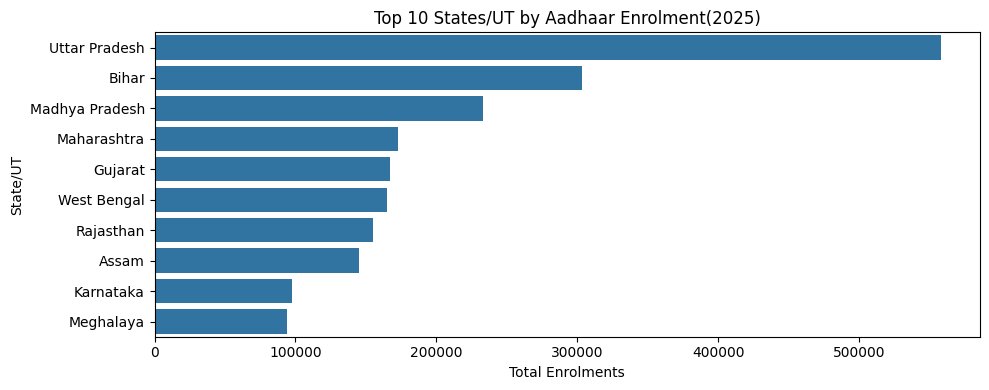

In [ ]:
plt.figure(figsize =(10,4))
sns.barplot(data = statewise.head(10),
            x= 'total_enrolment', y= 'state')

plt.title('Top 10 States/UT by Aadhaar Enrolment(2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


# **Top 10 States by Aadhaar Enrolment**

**KEY INSIGHTS:**

*   Uttar Pradesh contributes the highest Aadhaar enrolment volume among all states
*   High‑population states such as Bihar, Maharashtra, Madhya Pradesh, and Gujarat dominate total enrolments


*   Aadhaar enrolment volume is strongly influenced by population size and service demand


*   High enrolment volume does not necessarily indicate full coverage or saturation








In [ ]:
statewise.tail(10)

,state,total_enrolment
23,Mizoram,3399.0
2,Arunachal Pradesh,2027.0
29,Sikkim,1214.0
26,Puducherry,1175.0
7,Dadra And Nagar Haveli And Daman And Diu,1074.0
5,Chandigarh,890.0
9,Goa,773.0
17,Ladakh,180.0
0,Andaman And Nicobar Islands,173.0
18,Lakshadweep,67.0


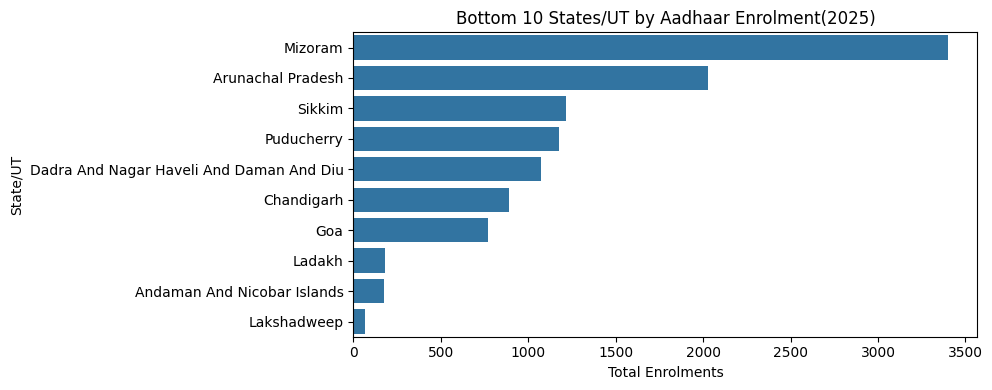

In [ ]:
plt.figure(figsize =(10,4))
sns.barplot(data = statewise.tail(10),
            x= 'total_enrolment', y= 'state')

plt.title('Bottom 10 States/UT by Aadhaar Enrolment(2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('State/UT')
plt.tight_layout()
plt.show()


# **Bottom 10 States / UTs by Aadhaar Enrolment**

**KEY INSIGHTS:**



*   Smaller states and Union Territories show significantly lower enrolment volumes
*   UTs such as Lakshadweep, Ladakh, and Andaman & Nicobar Islands have limited enrolment activity
*   Lower volumes reflect population size, geographic isolation, and accessibility challenges
*   These regions may require customised and region‑specific enrolment strategies




In [ ]:
total_national = statewise['total_enrolment'].sum()
statewise['percentage'] = (statewise['total_enrolment']/total_national*100)

statewise[['state' , 'percentage']].head()

,state,percentage
33,Uttar Pradesh,21.140659
4,Bihar,11.484873
19,Madhya Pradesh,8.828677
20,Maharashtra,6.537760
10,Gujarat,6.334347


In [ ]:
top5 = statewise.head(5).copy()
others_sum = statewise.iloc[5:]['total_enrolment'].sum()

top5 = pd.concat([ top5, pd.DataFrame({'state': [' All Other States'], 'total_enrolment': [others_sum]})])

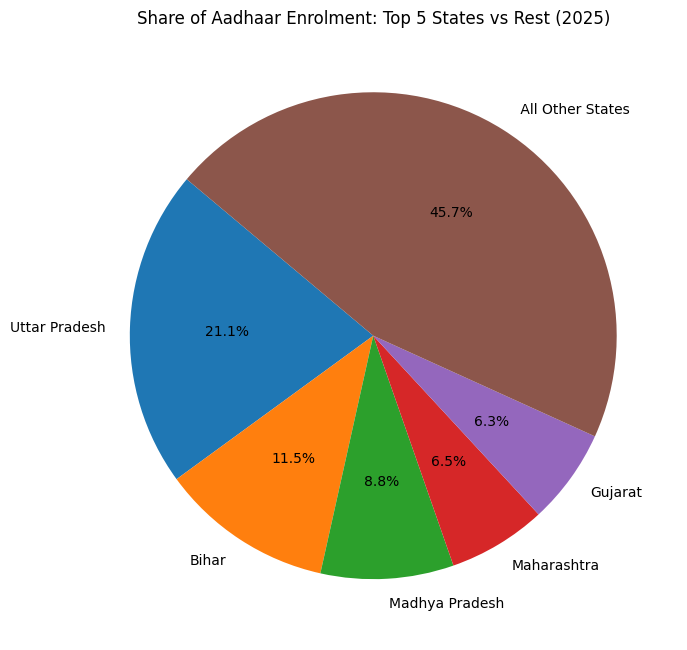

In [ ]:
plt.figure(figsize=(7,7))
plt.pie(
    top5['total_enrolment'],
    labels = top5['state'],
    autopct = '%1.1f%%',
    startangle = 140)

plt.title('Share of Aadhaar Enrolment: Top 5 States vs Rest (2025)')
plt.tight_layout()
plt.show()

# **Share of Aadhaar Enrolment (Top 5 States vs Rest of India)**

KEY INSIGHTS:



*   Aadhaar enrolment is highly concentrated in a small number of large states
*   Top 5 states account for a substantial share of total enrolments
*   Remaining states and UTs collectively contribute a smaller portion
*   Highlights the need for differentiated strategies for high‑volume and low‑volume regions



# AGE‑GROUP ANALYSIS

In [ ]:
age_state = (df_clean.groupby('state')[['age_0_5', 'age_5_17', 'age_18_greater']].sum().reset_index())

In [ ]:
age_state['total_enrolment'] = (
    age_state['age_0_5'] +
    age_state['age_5_17'] +
    age_state['age_18_greater'])

age_state['child_share_0_5'] = (
    age_state['age_0_5'] / age_state['total_enrolment'] * 100)


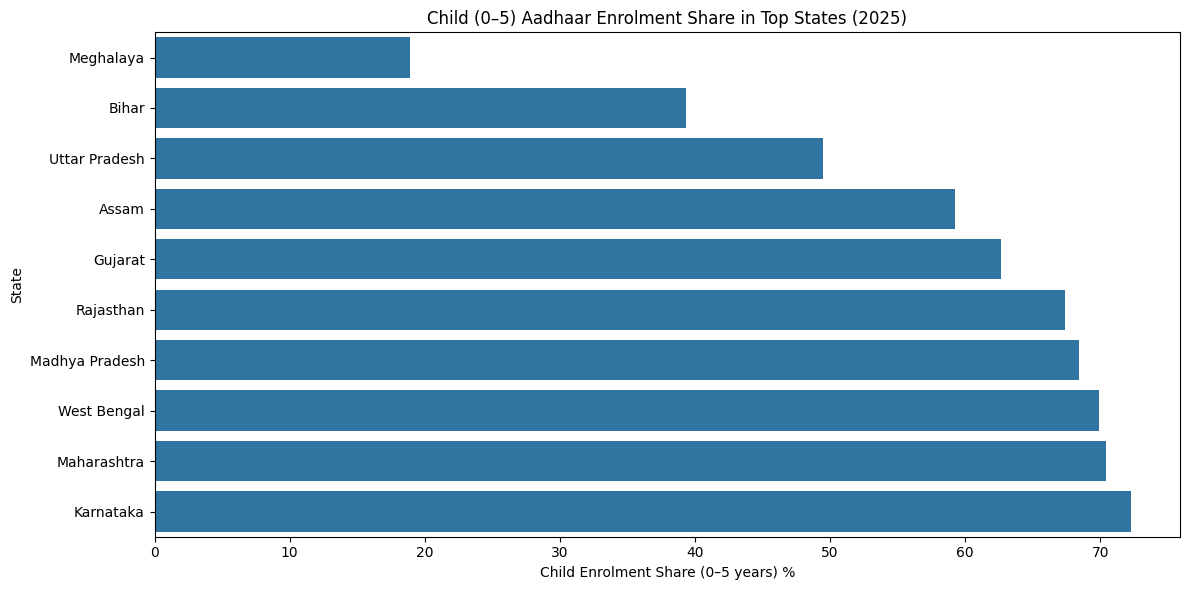

In [ ]:
top10_states = statewise.head(10)['state']

age_top10 = age_state[age_state['state'].isin(top10_states)]

plt.figure(figsize=(12,6))
sns.barplot(
    data=age_top10.sort_values('child_share_0_5'),
    x='child_share_0_5',
    y='state')
plt.xlabel('Child Enrolment Share (0–5 years) %')
plt.ylabel('State')
plt.title('Child (0–5) Aadhaar Enrolment Share in Top States (2025)')
plt.tight_layout()
plt.show()


# **Child (0–5) Aadhaar Enrolment Share**

KEY INSIGHTS:
*   Significant variation exists in child enrolment share across high‑enrolment states
*   Southern and western states demonstrate stronger early‑age Aadhaar coverage
*   Some high‑population states show relatively lower child enrolment share
*   Meghalaya and certain northeastern states exhibit uneven child enrolment patterns
*   Early‑age Aadhaar enrolment remains a key opportunity area for improvement



In [ ]:
overall_age = df_clean[['age_0_5', 'age_5_17', 'age_18_greater']].sum()

overall_age

,0
age_0_5,1582622.0
age_5_17,940335.0
age_18_greater,115026.0


In [ ]:
overall_total = overall_age.sum()
overall_age_percent = (overall_age / overall_total * 100).round(2)
overall_age_percent

,0
age_0_5,59.99
age_5_17,35.65
age_18_greater,4.36


# **Overall Age‑Group Distribution**

KEY INSIGHTS:
*   Children aged 0–5 years account for the largest share (≈60%) of Aadhaar enrolments in 2025
*   The 5–17 age group contributes around 36%, indicating strong enrolment during school‑age years
*   Adult (18+) enrolment forms a very small share (≈4%), suggesting Aadhaar enrolment is largely driven by early‑life registration and updates rather than first‑time adult enrolment
*   The distribution indicates a shift towards early‑age Aadhaar coverage, which supports long‑term inclusion and lifecycle‑based service delivery







In [ ]:
age_state['child_share_0_5'] = (age_state['age_0_5'] / age_state['total_enrolment'] * 100)


In [ ]:
print(age_state.columns)


Index(['state', 'age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment',
       'child_share_0_5'],
      dtype='object')


In [ ]:
# Step 1: Take top 10 states from statewise
top10_states = statewise[['state', 'total_enrolment']].head(10)

# Step 2: Merge child share from age_state
summary_top10 = top10_states.merge(
    age_state[['state', 'child_share_0_5']],
    on='state',
    how='left'
)

# Step 3: Rename & round
summary_top10 = summary_top10.rename(columns={
    'total_enrolment': 'Total Enrolment',
    'child_share_0_5': 'Child (0–5) Share %'
})

summary_top10['Child (0–5) Share %'] = summary_top10['Child (0–5) Share %'].round(2)

summary_top10



,state,Total Enrolment,Child (0–5) Share %
0,Uttar Pradesh,557687.0,49.45
1,Bihar,302969.0,39.34
2,Madhya Pradesh,232899.0,68.42
3,Maharashtra,172465.0,70.43
4,Gujarat,167099.0,62.67
5,West Bengal,164867.0,69.93
6,Rajasthan,154860.0,67.39
7,Assam,145039.0,59.21
8,Karnataka,97668.0,72.28
9,Meghalaya,94116.0,18.91


# **District Level Analysis(UP)**

In [ ]:
up_df = df_clean[df_clean['state']== 'Uttar Pradesh'].copy()

In [ ]:
up_district = (up_df.groupby('district')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending = False))

In [ ]:
top5_up = up_district.head(25)
bottom5_up = up_district.tail(25)

top5_up, bottom5_up

(               district  total_enrolment
 10             Bahraich          28340.0
 83              Sitapur          20866.0
 77         Shahjahanpur          18015.0
 0                  Agra          17949.0
 1               Aligarh          17788.0
 16             Bareilly          17191.0
 39               Hardoi          16198.0
 87             Varanasi          14625.0
 47         Kanpur Nagar          14558.0
 50                Kheri          14252.0
 64            Moradabad          14215.0
 62               Meerut          14126.0
 71               Rampur          13891.0
 33            Ghaziabad          13088.0
 55              Lucknow          12819.0
 32  Gautam Buddha Nagar          12629.0
 86                Unnao          11819.0
 56          Maharajganj          11533.0
 36            Gorakhpur          10927.0
 72           Saharanpur          10304.0
 8              Azamgarh          10011.0
 66             Pilibhit           9616.0
 20               Budaun          

In [ ]:
up_df['district'] = (up_df['district'].astype(str).str.lower().str.strip().str.replace('*', '', regex = False))

In [ ]:
district_corrections_up = {
    # Bhadohi / Sant Ravidas Nagar
    'bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar': 'sant ravidas nagar',

    # Kushinagar
    'kushi nagar': 'kushinagar',
    'kushinagar': 'kushinagar',

    # Maharajganj
    'mahrajganj': 'maharajganj',
    'maharajganj': 'maharajganj',

    # Ayodhya
    'faizabad': 'ayodhya',
    'ayodhya': 'ayodhya',

    # Amroha
    'jyotiba phule nagar': 'amroha',
    'amroha': 'amroha'}


In [ ]:
up_df['district'] = up_df['district'].replace(district_corrections_up)


In [ ]:
up_df['district'] = up_df['district'].str.title()


In [ ]:
up_district = (
    up_df
    .groupby('district')['total_enrolment']
    .sum()
    .reset_index()
    .sort_values('total_enrolment', ascending=False))


In [ ]:
top5_up = up_district.head(25)
bottom5_up = up_district.tail(25)

top5_up, bottom5_up


(               district  total_enrolment
 10             Bahraich          28340.0
 77              Sitapur          20866.0
 71         Shahjahanpur          18015.0
 0                  Agra          17949.0
 1               Aligarh          17788.0
 16             Bareilly          17191.0
 37               Hardoi          16198.0
 81             Varanasi          14625.0
 44         Kanpur Nagar          14558.0
 47                Kheri          14252.0
 59            Moradabad          14215.0
 57               Meerut          14126.0
 66               Rampur          13891.0
 31            Ghaziabad          13088.0
 51              Lucknow          12819.0
 30  Gautam Buddha Nagar          12629.0
 80                Unnao          11819.0
 52          Maharajganj          11534.0
 34            Gorakhpur          10927.0
 67           Saharanpur          10304.0
 8              Azamgarh          10011.0
 61             Pilibhit           9616.0
 19               Budaun          

In [ ]:
up_df['district'] = (up_df['district'].astype(str).str.lower().str.strip().str.replace('*', '', regex=False))


In [ ]:
district_corrections_up = {
    # Rae Bareli
    'rae bareli': 'raebareli',
    'raebareli': 'raebareli',

    # Shravasti
    'shravasti': 'shravasti',
    'shrawasti': 'shravasti',

    # Sant Ravidas Nagar / Bhadohi
    'bhadohi': 'sant ravidas nagar',
    'sant ravidas nagar': 'sant ravidas nagar',

    # Kushinagar
    'kushi nagar': 'kushinagar',
    'kushinagar': 'kushinagar',

    # Maharajganj
    'mahrajganj': 'maharajganj',
    'maharajganj': 'maharajganj',

    # Ayodhya
    'faizabad': 'ayodhya',
    'ayodhya': 'ayodhya',

    # Amroha
    'jyotiba phule nagar': 'amroha',
    'amroha': 'amroha'}


In [ ]:
up_df['district'] = up_df['district'].replace(district_corrections_up)


In [ ]:
up_df['district'] = up_df['district'].str.title()


In [ ]:
up_district = (up_df.groupby('district')['total_enrolment'].sum().reset_index().sort_values('total_enrolment', ascending=False))


In [ ]:
up_district[up_district['district'].isin(
    ['Rae Bareli', 'Raebareli', 'Shravasti', 'Shrawasti'])]


,district,total_enrolment
71,Shravasti,5228.0
63,Raebareli,2918.0


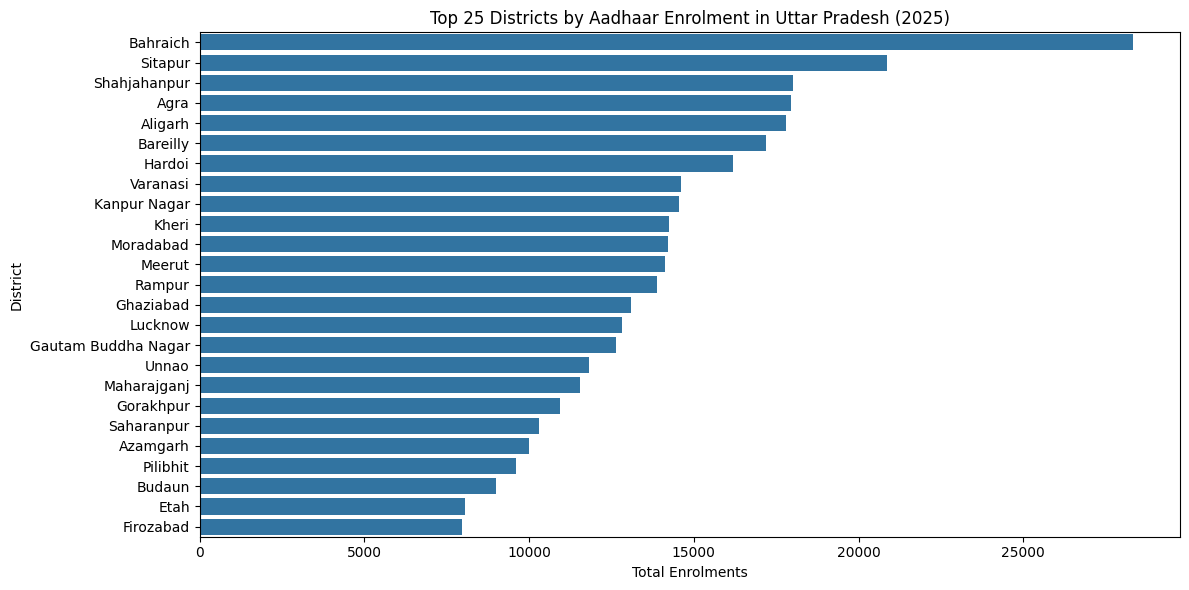

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=top5_up,
    x='total_enrolment',
    y='district'
)
plt.title('Top 25 Districts by Aadhaar Enrolment in Uttar Pradesh (2025)')
plt.xlabel('Total Enrolments')
plt.ylabel('District')
plt.tight_layout()
plt.show()

In [ ]:
df_clean['date'] = pd.to_datetime(df_clean['date'], errors='coerce')

In [ ]:
df_clean['date'].min(), df_clean['date'].max()

(Timestamp('2025-01-04 00:00:00'), Timestamp('2025-12-11 00:00:00'))

In [ ]:
monthly_enrol = (df_clean.groupby(df_clean['date'].dt.to_period('M'))['total_enrolment'].sum().reset_index())
monthly_enrol['month'] = monthly_enrol['date'].dt.strftime('%b %Y')
monthly_enrol

,date,total_enrolment,month
0,2025-01,1366494.0,Jan 2025
1,2025-02,176673.0,Feb 2025
2,2025-03,103519.0,Mar 2025
3,2025-04,66356.0,Apr 2025
4,2025-05,101662.0,May 2025
5,2025-06,102542.0,Jun 2025
6,2025-07,56988.0,Jul 2025
7,2025-08,135743.0,Aug 2025
8,2025-09,140130.0,Sep 2025
9,2025-10,151285.0,Oct 2025


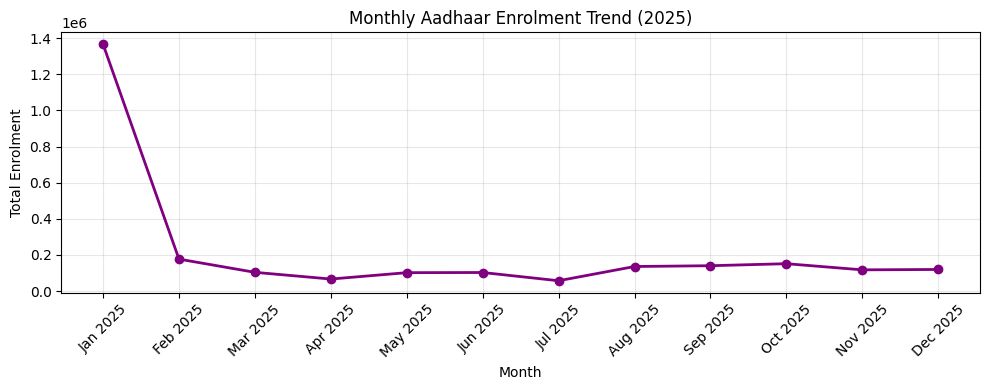

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    monthly_enrol['month'],
    monthly_enrol['total_enrolment'],
    marker='o',
    color='purple',
    linewidth=2)

plt.title('Monthly Aadhaar Enrolment Trend (2025)')
plt.xlabel('Month')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **Temporal Insights (Aadhaar Enrolment 2025)**
National‑Level Enrolment Insights

* Aadhaar enrolment shows a very high spike in January, indicating a strong front‑loaded enrolment phase.

* A sharp decline from February to April suggests rapid saturation after initial enrolment drives.

* From May onwards, enrolment stabilizes at a significantly lower but consistent level.

* Minor increases during August–October indicate periodic or residual enrolment activity rather than mass registration.

* The rolling 3‑month average confirms a structural downward shift, not random monthly volatility.

* Overall, enrolment activity transitions from creation‑heavy to maintenance‑oriented over the year.

In [ ]:
monthly_enrol['rolling_3m'] = (monthly_enrol['total_enrolment'].rolling(window=3).mean())

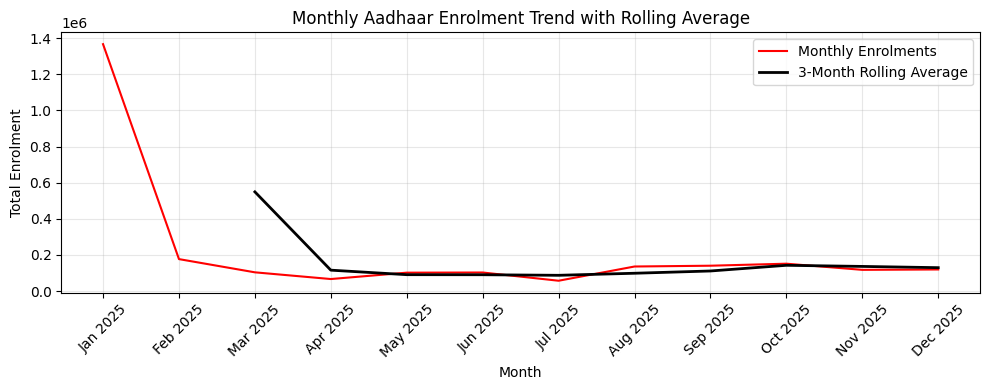

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    monthly_enrol['month'],
    monthly_enrol['total_enrolment'],
    label='Monthly Enrolments',
    color='Red',
    linewidth=1.5)

plt.plot(
    monthly_enrol['month'],
    monthly_enrol['rolling_3m'],
    label='3‑Month Rolling Average',
    color='black',
    linewidth=2)

plt.title('Monthly Aadhaar Enrolment Trend with Rolling Average')
plt.xlabel('Month')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
up_enrol = df_clean[df_clean['state'] == 'Uttar Pradesh']

In [ ]:
up_enrol.shape

(35991, 9)

In [ ]:
up_monthly_enrol = (up_enrol.groupby(up_enrol['date'].dt.to_period('M'))['total_enrolment'].sum().reset_index())
up_monthly_enrol['month'] = up_monthly_enrol['date'].dt.strftime('%b %Y')
up_monthly_enrol


,date,total_enrolment,month
0,2025-01,329909.0,Jan 2025
1,2025-02,30437.0,Feb 2025
2,2025-03,19071.0,Mar 2025
3,2025-04,13149.0,Apr 2025
4,2025-05,17694.0,May 2025
5,2025-06,19078.0,Jun 2025
6,2025-07,10981.0,Jul 2025
7,2025-08,22684.0,Aug 2025
8,2025-09,25152.0,Sep 2025
9,2025-10,29088.0,Oct 2025


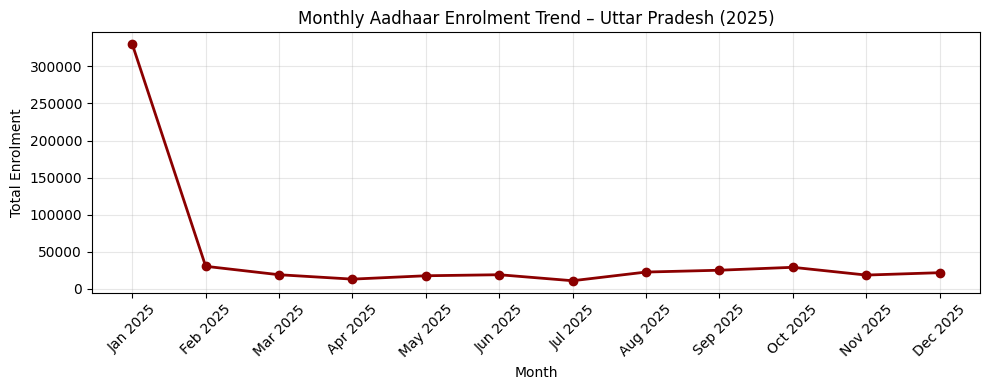

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(
    up_monthly_enrol['month'],
    up_monthly_enrol['total_enrolment'],
    marker='o',
    color='darkred',
    linewidth=2)

plt.title('Monthly Aadhaar Enrolment Trend – Uttar Pradesh (2025)')
plt.xlabel('Month')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
up_monthly_enrol['rolling_3m'] = (up_monthly_enrol['total_enrolment'].rolling(window=3).mean())

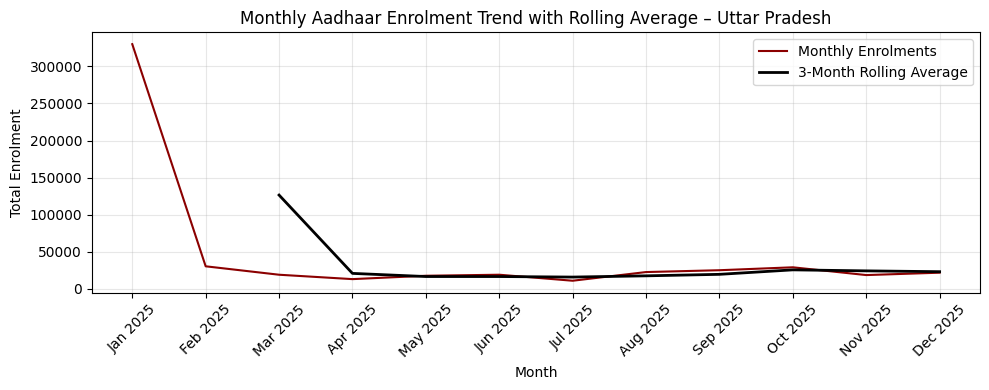

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(
    up_monthly_enrol['month'],
    up_monthly_enrol['total_enrolment'],
    label='Monthly Enrolments',
    color='darkred',
    linewidth=1.5)

plt.plot(
    up_monthly_enrol['month'],
    up_monthly_enrol['rolling_3m'],
    label='3‑Month Rolling Average',
    color='black',
    linewidth=2)

plt.title('Monthly Aadhaar Enrolment Trend with Rolling Average – Uttar Pradesh')
plt.xlabel('Month')
plt.ylabel('Total Enrolment')
plt.xticks(rotation=45)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# **State‑Level Temporal Insights (Uttar Pradesh)**

* Uttar Pradesh follows the same temporal pattern as the national trend, with a pronounced January peak.

* Enrolment drops sharply after February, mirroring national saturation behavior.

* Post‑April enrolment remains low and steady, indicating limited new enrolment demand.

* A modest rise during August–October aligns with the national pattern, reinforcing scale consistency.

* The rolling average smooths early volatility and highlights a stable low‑enrolment regime for the remainder of the year.

# **Scale Consistency Insight (Temporal)**
* Temporal enrolment patterns in Uttar Pradesh closely mirror national enrolment behavior.

* This confirms that high‑population states drive national enrolment trends, rather than exhibiting independent dynamics.

* Consistent patterns across scales indicate system‑wide enrolment saturation, not region‑specific anomalies.


# **Lifecycle Interpretation (Temporal)**
* Enrolment activity is time‑concentrated, with most identity creation occurring early in the year.

* Subsequent months reflect a shift toward update‑centric Aadhaar usage, rather than new enrolments.

* This temporal transition supports the broader lifecycle finding that Aadhaar functions as a continuously maintained system, not a one‑time registration process.

# **District‑Level Insights**

KEY INSIGHTS(UP):



*   Aadhaar enrolment within Uttar Pradesh is unevenly distributed across districts
*   A small number of districts contribute a disproportionately high share of total enrolments
*   Several districts show very low enrolment volumes, indicating possible access or awareness gaps
*   District‑level variation highlights the importance of targeted operational planning within large states



# **Why this matters:**



*   Aadhaar is critical for access to welfare, education, and healthcare
*   Low child enrolment can delay access to benefits like nutrition schemes
*   Regional disparities indicate where targeted interventions are required

*   Early Aadhaar coverage improves long‑term service delivery efficiency







# **🔹 Recommendations for UIDAI**



*   Launch targeted child enrolment drives in low‑share states
*   Integrate Aadhaar enrolment with birth registration systems
*   Use Anganwadi and school networks for early enrolment
*   Deploy mobile enrolment units in rural and underserved districts
*   Monitor child enrolment as a key KPI alongside total enrolment



# **Conclusion**

This analysis highlights significant regional and age‑wise disparities in Aadhaar enrolment. While overall enrolment is high in populous states, child enrolment remains uneven across regions. Targeted, early‑age enrolment strategies can help UIDAI achieve more inclusive and future‑ready Aadhaar coverage.